In [1]:
import ciao_contrib.runtool as rt
import sherpa.astro.ui as ui
from sherpa.astro import io
import numpy as np
import matplotlib.pyplot as plt
import os

If all files use the same WCS coordinates, we can rename the region('blah') to just be that one single file, which would be helpful.

In [10]:
def extract_spec(obsid):
    '''
    Extract the spectrum from the evt2 file and save into the data folder
    with the name of the observation ID followed by GW170817.

    Parameters
    ----------
    obsid : int
        The observation ID of the data to be extracted

    Returns
    -------
    None
    '''
    spec = rt.specextract
    spec.punlearn()
    spec.infile = f'data/{obsid}/repro/acisf{obsid}_repro_evt2.fits[sky=region(data/{obsid}/repro/srcwcs.reg)]'
    spec.bkgfile = f'data/{obsid}/repro/acisf{obsid}_repro_evt2.fits[sky=region(data/{obsid}/repro/bkgwcs.reg)]'
    spec.outroot = f'data/{obsid}/GW170817/GW170817'
    spec.correctpsf = 'yes'
    spec.weight = 'no'
    spec()

In [37]:
extract_spec(20861)

In [3]:
# Run detect on the evt2 file to create a source list using the celldetect method

def detect_srcs(obsid):

    '''
    Run the celldetect method on the evt2 file to create a source list.

    Parameters
    ----------
    obsid : int
        The observation ID of the data to be extracted

    Returns
    -------
    None
    '''

    detect = rt.celldetect
    detect.punlearn()
    detect.infile = f'data/{obsid}/repro/acisf{obsid}_repro_evt2.fits'
    detect.outfile = f'data/{obsid}/GW170817/GW170817_src_6.fits'
    detect.fixedcell = 6
    detect.thresh = 3
    #detect.snr_diminution = 0.75
    detect.clobber = 'yes'
    detect()

def detect_srcs_wav(obsid):

    detect = rt.wavdetect
    detect.punlearn()
    detect.infile = f'data/{obsid}/repro/acisf{obsid}_repro_evt2.fits'
    detect.outfile = f'data/{obsid}/GW170817/GW170817_src_wav9.fits'
    detect.scellfile = f'data/{obsid}/GW170817/GW170817_scell.fits'
    detect.imagefile = f'data/{obsid}/GW170817/GW170817_img.fits'
    detect.clobber = 'yes'
    detect.sigthresh = 1e-9
    detect.defnbkgfile = f'data/{obsid}/GW170817/GW170817_defnbkg.fits'
    detect()

In [5]:
detect_srcs(20860)

In [4]:
detect_srcs(20936)

In [6]:
# Create GW170817 directory in data/{obsid}

def create_GWdir(obsid):
    os.mkdir(f'data/{obsid}/GW170817')

In [13]:
create_GWdir(20861)


detect_srcs(20861)

In [7]:
def reproject(obsid_in, obsid_ref):

    reproj = rt.reproject_aspect
    reproj.punlearn()
    reproj.infile = f'data/{obsid_in}/GW170817/GW170817_src_6.fits'
    reproj.refsrcfile = f'data/{obsid_ref}/GW170817/GW170817_src_6.fits'
    reproj.updfile = f'data/{obsid_in}/repro/acisf{obsid_in}_repro_evt2.fits'
    reproj.wcsfile = f'data/{obsid_in}/repro/acisf{obsid_in}_repro_evt2.fits'
    reproj.method = 'trans'
    reproj.residlim = 0.5
    reproj.outfile = f'data/{obsid_in}/GW170817/GW170817_reproj.fits'
    reproj.clobber = 'yes'
    reproj()

THIS WORKS

In [8]:
reproject(20936, 20860)

In [9]:
def src_reproject(obsid_in, obsid_ref):
    ''' 
    Create a source list and then reproject to match the reference obsid.
    '''
    if not os.path.exists(f'data/{obsid_in}/GW170817'):
        create_GWdir(obsid_in)

    detect_srcs(obsid_in)

    reproject(obsid_in, obsid_ref)

In [10]:
src_reproject(20936, 20860)

# ObsID List and Epoch List

In [10]:
# Get list of folders in data folder
obsids = os.listdir('data')
obsids.remove('20936 - Copy') # Remove copy of 20936
obsids.remove('20860') # Remove 20860, as we don't need to reproject it

# Sort obsids by number
obsids.sort(key=lambda x: int(x.split()[0]))

Below gives a list of epochs listing ObsIDs for each epoch. These ObsIDs should be combined for each epoch. Note that ObsIDs before the lightcurve peak have been removed to simplify our analysis.

In [11]:
epoch_obsid_list = [['20860','20861'],
 ['20936','20937','20938','20939','20945'],
 ['21080','21090'],
 ['21371'],
 ['21322','22157','22158'],
 ['21372','22736','22737'],
 ['21323','23183','23184','23185'],
 ['22677','24887','24888','24889'], # Maybe combine this with the next one too?
 ['23870','24923','24924'],
 ['23869','26223','24336','24337'],
 ['25733','25734','25527'],
 ['27088','27089','27090','27731','27091','25528','27752','27753','27754']]

Include code below to reproject all ObsIDs to match ObsID 20860 (the first one).

In [12]:
# The list below is the same as the one above, but flattened, and without 20860.
# Thus, we can iterate over this list to reproject all the data.
obsid_list = [item for sublist in epoch_obsid_list for item in sublist]
obsid_list.remove('20860') # Remove 20860, as we don't need to reproject it
len(obsid_list)

42

In [13]:
src_reproject(20937, 20860)

In [14]:
for obsid in obsid_list: # Used size 6, thresh 2.5 I think??
    print(f'trying {obsid}')
    # Try to reproject the observation
    try:

        src_reproject(obsid, '20860')
        # print percentage complete
        print(f'{obsid_list.index(obsid)/len(obsid_list)*100:.2f}% complete')

    except:
            
        print(f'Failed on {obsid}, continuing...')
        continue

trying 20861
0.00% complete
trying 20936
2.38% complete
trying 20937
4.76% complete
trying 20938
7.14% complete
trying 20939
9.52% complete
trying 20945
11.90% complete
trying 21080
14.29% complete
trying 21090
16.67% complete
trying 21371
19.05% complete
trying 21322
21.43% complete
trying 22157
23.81% complete
trying 22158
26.19% complete
trying 21372
28.57% complete
trying 22736
30.95% complete
trying 22737
33.33% complete
trying 21323
35.71% complete
trying 23183
38.10% complete
trying 23184
40.48% complete
trying 23185
42.86% complete
trying 22677
45.24% complete
trying 24887
47.62% complete
trying 24888
50.00% complete
trying 24889
52.38% complete
trying 23870
54.76% complete
trying 24923
57.14% complete
trying 24924
59.52% complete
trying 23869
61.90% complete
trying 26223
64.29% complete
trying 24336
66.67% complete
trying 24337
69.05% complete
trying 25733
71.43% complete
trying 25734
73.81% complete
trying 25527
76.19% complete
trying 27088
78.57% complete
trying 27089
80.95%

In [62]:
fail_list = [20937,20938,20939,23183,23869,24337,27088,25528,27752,27753,27754]
# Add single quotes around each obsid from above
fail_list = [f'{obsid}' for obsid in fail_list]
fail_list # Used thresh 3, size 9 to get all but 23869 to work, changing thresh to 2.5 gets all of them.

['20937',
 '20938',
 '20939',
 '23183',
 '23869',
 '24337',
 '27088',
 '25528',
 '27752',
 '27753',
 '27754']

In [61]:
fail_list

['23183', '25528']

In [63]:
for obsid in fail_list:
    
    # Try to reproject the observation

    # If it fails, try again
    try:
        print(f'trying {obsid}')
        src_reproject(obsid, '20860')
        # print percentage complete
        print(f'{obsid_list.index(obsid)/len(fail_list)*100:.2f}% complete')

    except:    
        print(f'Failed on {obsid}, continuing...')
        continue

trying 20937
4.76% complete
trying 20938
7.14% complete
trying 20939
9.52% complete
trying 23183
38.10% complete
trying 23869
61.90% complete
trying 24337
69.05% complete
trying 27088
78.57% complete
trying 25528
90.48% complete
trying 27752
92.86% complete
trying 27753
95.24% complete
trying 27754
97.62% complete


Include code below to combine observations within each epoch.

# Trying to get inline image viewing

In [15]:

import astropy
import sherpa.astro.io.pyfits_backend
io.backend = sherpa.astro.io.pyfits_backend

io.backend

<module 'sherpa.astro.io.pyfits_backend' from '/home/pegriffin/miniconda3/envs/ciao-4.15/lib/python3.10/site-packages/sherpa/astro/io/pyfits_backend.py'>

In [18]:
img = io.read_image(f'data/20936/repro/acisf20936_repro_evt2.fits')

IndexError: tuple index out of range

In [23]:
import sherpa.image

In [43]:
ds9 = sherpa.image.Image
ds9.open()
ds9.image(f'data/20936/GW170817/cutout.fits')

TypeError: Image.image() missing 1 required positional argument: 'array'

In [37]:
def generate_cutout(obsid):
    '''Generate a cutout from pixels (4000,4000) to (4200,4200) and save as cutout.fits
    using dmcopy'''
    dmcopy = rt.dmcopy
    dmcopy.punlearn()
    dmcopy.infile = f'data/{obsid}/repro/acisf{obsid}_repro_evt2.fits[sky=box(4100,4100,200,200)]'
    dmcopy.outfile = f'data/{obsid}/GW170817/cutout.fits'
    dmcopy.clobber = 'yes'
    dmcopy()

In [38]:
generate_cutout(20936)

In [39]:
#Load image into sherpa using load_image

sherpa.astro.ui.load_image(f'data/20936/GW170817/cutout.fits')

IndexError: tuple index out of range

In [1]:
from regions import Regions

In [2]:
regions = Regions.read(f'data/20936/repro/srcwcs.reg', format='ds9')
regions

<Regions([<CircleSkyRegion(center=<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (197.45024875, -23.38134333)>, radius=1.0 arcsec)>])>

Filename: data/20936/GW170817/cutout.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  EVENTS        1 BinTableHDU   1125   5210R x 20C   [1D, 1J, 1I, 1I, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 25I, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           2 BinTableHDU     28   2R x 2C   [1D, 1D]   


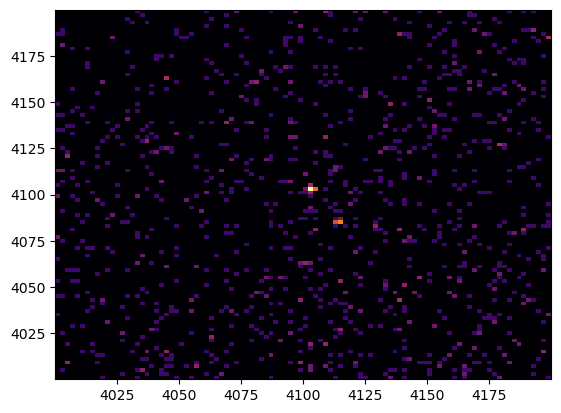

In [59]:
# Load cutout.fits and display using astropy

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table

hdu = fits.open(f'data/20936/GW170817/cutout.fits')
hdu.info()

evt_data = Table(hdu[1].data)

ii = np.in1d(evt_data['ccd_id'], [7])
np.sum(ii)

NBINS = (100,100)
img_zero_mpl = plt.hist2d(evt_data['x'][ii], evt_data['y'][ii], bins=NBINS, cmap='inferno', norm=LogNorm(clip=True))


In [50]:
np.sum(ii)

0

In [51]:
evt_data
data/20860/repro/acisf20860_repro_evt2.fits,data/20861/repro/acisf20861_repro_evt2.fits


time,expno,ccd_id,node_id,chipx,chipy,tdetx,tdety,detx,dety,x,y,phas,pha,pha_ro,energy,pi,fltgrade,grade,status
float64,int32,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,"int16[5,5]",int32,int32,float32,int32,int16,int16,bool[32]
632613318.5702482,4,7,0,253,645,4170,2347,4129.0356,3983.3542,4010.0083,4025.8704,4 .. -2,3266,3150,14580.498,999,208,6,False .. False
632613321.7113091,5,7,1,294,613,4211,2315,4169.6235,4016.0417,4055.9646,4002.279,11 .. 2,1611,1531,7560.194,518,2,2,False .. False
632613324.8523492,6,7,1,299,488,4216,2190,4174.6826,4140.8745,4171.822,4048.3005,1 .. 2,3185,3074,14920.029,1022,2,2,False .. False
632613327.9933892,7,7,0,107,577,4024,2279,3982.898,4052.106,4012.5732,4188.009,2 .. 3,125,105,584.2242,41,2,2,False .. False
632613331.1344395,8,7,1,278,472,4195,2174,4153.335,4156.479,4176.5005,4074.3926,-3 .. 6,2996,2882,14031.285,962,8,3,False .. False
632613343.6986201,12,7,0,181,521,4098,2223,4057.2065,4107.977,4091.7864,4143.2417,-2 .. 4,2321,2242,10355.84,710,22,6,False .. False
632613346.8396603,13,7,0,157,443,4074,2145,4033.1726,4185.2305,4151.959,4196.5728,0 .. 0,2155,2085,9627.083,660,80,6,False .. False
632613353.1217507,15,7,1,313,564,4230,2266,4188.888,4064.3203,4103.855,4005.554,4 .. 6,2766,2660,12958.801,888,80,6,False .. False
632613362.5448912,18,7,1,296,615,4213,2317,4171.2344,4013.6646,4049.2788,4001.7178,0 .. -3,3165,3085,14827.539,1016,8,3,False .. False


## Useless reproject wav code

In [40]:
detect_srcs_wav(20860)

In [41]:
detect_srcs_wav(20936)

In [53]:
def reproject_wav(obsid_in, obsid_ref):

    reproj = rt.reproject_aspect
    reproj.punlearn()
    reproj.infile = f'data/{obsid_in}/GW170817/GW170817_src_wav9.fits'
    reproj.refsrcfile = f'data/{obsid_ref}/GW170817/GW170817_src_wav9.fits'
    reproj.updfile = f'data/{obsid_in}/repro/acisf{obsid_in}_repro_evt2.fits'
    reproj.wcsfile = f'data/{obsid_ref}/repro/acisf{obsid_ref}_repro_evt2.fits'
    reproj.residlim = 2
    reproj.outfile = f'data/{obsid_in}/GW170817/GW170817_reproj.fits'
    reproj()

In [54]:
reproject_wav(20936, 20860)